In [2]:
from datetime import datetime
import pandas as pd
import seaborn as sns
from nltk.stem import SnowballStemmer
import warnings
warnings.filterwarnings("ignore")
from nltk.stem import WordNetLemmatizer
import string
from matplotlib import pyplot as plt
import xgboost
from sklearn.svm import SVC, SVR
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import fbeta_score as fb, f1_score as f1, silhouette_score as shs
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
import numpy as np
from sklearn.cluster import KMeans, hierarchical 
from sklearn.metrics.pairwise import euclidean_distances
import scipy as sp
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from textblob import TextBlob, Word
from sklearn.linear_model import LogisticRegression, LinearRegression, ElasticNet
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.preprocessing import StandardScaler, LabelEncoder, Imputer
from sklearn.decomposition import PCA
from sklearn.externals import joblib
from sklearn.model_selection import train_test_split as tts
stop_words = stopwords.words('english')
ss = StandardScaler()
pca = PCA(24)
le = LabelEncoder()
imp = Imputer(strategy = 'median')
lemmatizer = WordNetLemmatizer()

In [3]:
df = pd.read_csv('Desktop/Datasets/train_V2.csv', header = 0, index_col = None)

In [21]:
df_test = pd.read_csv('Desktop/Datasets/test_V2.csv', header = 0, index_col = None)

In [5]:
arr = []
for i in range(43000):
    arr.append(df.iloc[i, :])
    
df_final = pd.DataFrame(arr)

In [17]:
df_final.head(20)

Id         groupId         matchId  assists  boosts  \
0   7f96b2f878858a  4d4b580de459be  a10357fd1a4a91        0       0   
1   eef90569b9d03c  684d5656442f9e  aeb375fc57110c        0       0   
2   1eaf90ac73de72  6a4a42c3245a74  110163d8bb94ae        1       0   
3   4616d365dd2853  a930a9c79cd721  f1f1f4ef412d7e        0       0   
4   315c96c26c9aac  de04010b3458dd  6dc8ff871e21e6        0       0   
5   ff79c12f326506  289a6836a88d27  bac52627a12114        0       0   
6   95959be0e21ca3  2c485a1ad3d0f1  a8274e903927a2        0       0   
7   311b84c6ff4390  eaba5fcb7fc1ae  292611730ca862        0       0   
8   1a68204ccf9891  47cfbb04e1b1a2  df014fbee741c6        0       0   
9   e5bb5a43587253  759bb6f7514fd2  3d3031c795305b        0       0   
10  2b574d43972813  c549efede67ad3  2dd6ddb8320fc1        0       0   
11  8de328a74658a9  f643df9df3877c  80170383d90003        0       0   
12  ce4f6ac165705e  da24cdb91969cc  535b5dbd965a94        0       0   
13  b7807186e3f679  3c08e461874749  2c30ddf481c52d        0       1   
14  8e244ac61b6aab  d40d0c7d3573a1  94e1c1cc443c65        0       1   
15  12d8d4bd94312c  fe52d481bae68b  6fd9e765ddd0c5        0       0   
16  62f2f0917d84b2  f61b698274d9f5  1d6cfe0f6f23b0        0       2   
17  92022479b92ce7  2f2c33f548c4b9  07948d723b9c0f        0       3   
18  7bd224781f064b  6dde607d151819  733af30cc00099        0       0   
19  71cbdbc3b263e5  7b61f74b51906c  a329ac99449ad7        0       1   

    damageDealt  DBNOs  headshotKills  heals  killPlace      ...       \
0         0.000      0              0      0         60      ...        
1        91.470      0              0      0         57      ...        
2        68.000      0              0      0         47      ...        
3        32.900      0              0      0         75      ...        
4       100.000      0              0      0         45      ...        
5       100.000      1              1      0         44      ...        
6         0.000      0              0      0         96      ...        
7         8.538      0              0      0         48      ...        
8        51.600      0              0      0         64      ...        
9        37.270      0              0      0         74      ...        
10       28.380      0              0      0         75      ...        
11      137.900      1              0      0         64      ...        
12        0.000      0              0      0         37      ...        
13      324.200      0              1      5          5      ...        
14      122.800      1              0      2         25      ...        
15       80.710      1              0      0         72      ...        
16       81.710      1              0     14         25      ...        
17      254.300      0              0     12         13      ...        
18        0.000      0              0      0         79      ...        
19       65.280      0              0      1         48      ...        

    revives  rideDistance  roadKills  swimDistance  teamKills vehicleDestroys  \
0         0        0.0000          0          0.00          0               0   
1         0        0.0045          0         11.04          0               0   
2         0        0.0000          0          0.00          0               0   
3         0        0.0000          0          0.00          0               0   
4         0        0.0000          0          0.00          0               0   
5         0        0.0000          0          0.00          0               0   
6         0        0.0000          0          0.00          0               0   
7         0     2004.0000          0          0.00          0               0   
8         0        0.0000          0          0.00          0               0   
9         0        0.0000          0          0.00          0               0   
10        0        0.0000          0          0.00          0               0   
11        0       

In [4]:
df.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc'],
      dtype='object')

In [82]:
summary = df_final.describe()

In [83]:
summary

assists        boosts   damageDealt         DBNOs  headshotKills  \
count  43000.000000  43000.000000  43000.000000  43000.000000   43000.000000   
mean       0.233977      1.123023    130.431115      0.658512       0.222140   
std        0.579962      1.725393    169.130994      1.154757       0.584658   
min        0.000000      0.000000      0.000000      0.000000       0.000000   
25%        0.000000      0.000000      0.000000      0.000000       0.000000   
50%        0.000000      0.000000     83.220000      0.000000       0.000000   
75%        0.000000      2.000000    185.300000      1.000000       0.000000   
max        9.000000     14.000000   2856.000000     32.000000      17.000000   

              heals     killPlace    killPoints         kills   killStreaks  \
count  43000.000000  43000.000000  43000.000000  43000.000000  43000.000000   
mean       1.369744     47.513535    508.045930      0.923047      0.544884   
std        2.655085     27.429540    627.166087      1.543469      0.715410   
min        0.000000      1.000000      0.000000      0.000000      0.000000   
25%        0.000000     24.000000      0.000000      0.000000      0.000000   
50%        0.000000     47.000000      0.000000      0.000000      0.000000   
75%        2.000000     71.000000   1174.000000      1.000000      1.000000   
max       47.000000    100.000000   2069.000000     24.000000      7.000000   

           ...            revives  rideDistance     roadKills  swimDistance  \
count      ...       43000.000000  43000.000000  43000.000000  43000.000000   
mean       ...           0.162140    609.712559      0.003651      4.383242   
std        ...           0.462646   1492.509995      0.080469     29.915869   
min        ...           0.000000      0.000000      0.000000      0.000000   
25%        ...           0.000000      0.000000      0.000000      0.000000   
50%        ...           0.000000      0.000000      0.000000      0.000000   
75%        ...           0.000000      6.445250      0.000000      0.000000   
max        ...           8.000000  25930.000000      6.000000   1220.000000   

          teamKills  vehicleDestroys  walkDistance  weaponsAcquired  \
count  43000.000000     43000.000000  43000.000000     43000.000000   
mean       0.024488         0.007907   1157.108029         3.676558   
std        0.169077         0.090132   1181.536504         2.426240   
min        0.000000         0.000000      0.000000         0.000000   
25%        0.000000         0.000000    158.700000         2.000000   
50%        0.000000         0.000000    696.700000         3.000000   
75%        0.000000         0.000000   1970.000000         5.000000   
max        4.000000         2.000000  13530.000000        50.000000   

          winPoints  winPlacePerc  
count  43000.000000  43000.000000  
mean     610.864953      0.473870  
std      740.164001      0.307416  
min        0.000000      0.000000  
25%        0.000000      0.200000  
50%        0.000000      0.461500  
75%     1495.000000      0.740700  
max     1906.000000      1.000000  

[8 rows x 25 columns]

In [84]:
summary['matchDuration']

count    43000.000000
mean        26.297538
std          4.313229
min          3.483333
25%         22.766667
50%         23.933333
75%         30.816667
max         36.966667
Name: matchDuration, dtype: float64

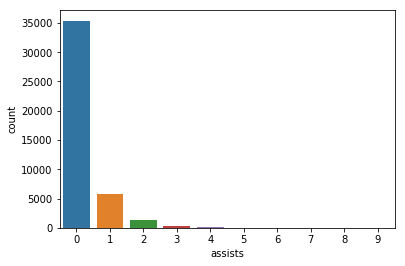

In [70]:
sns.countplot(x = 'assists', data = df_final)
plt.show()

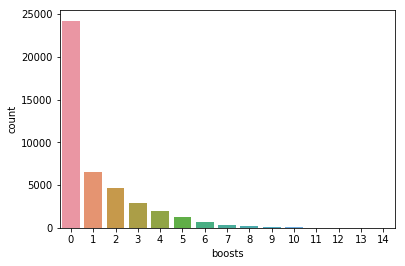

In [68]:
sns.countplot(x = 'boosts', data = df_final)
plt.show()

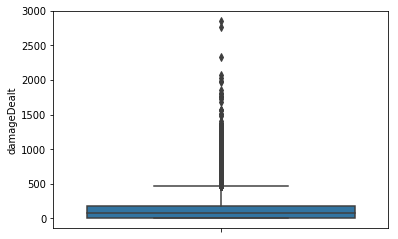

In [55]:
sns.boxplot(data = df_final, y = "damageDealt")
plt.show()

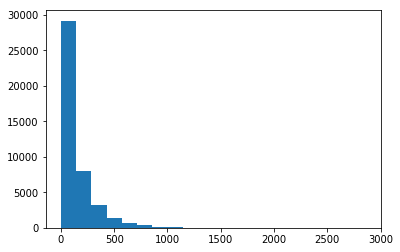

In [14]:
plt.hist(df_final['damageDealt'], bins = 20)
plt.show()

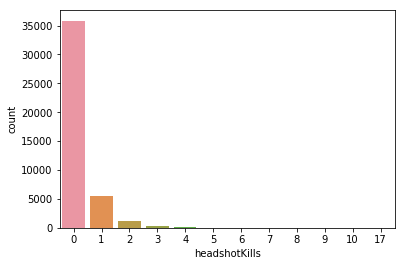

In [67]:
sns.countplot(x = 'headshotKills', data = df_final)
plt.show()

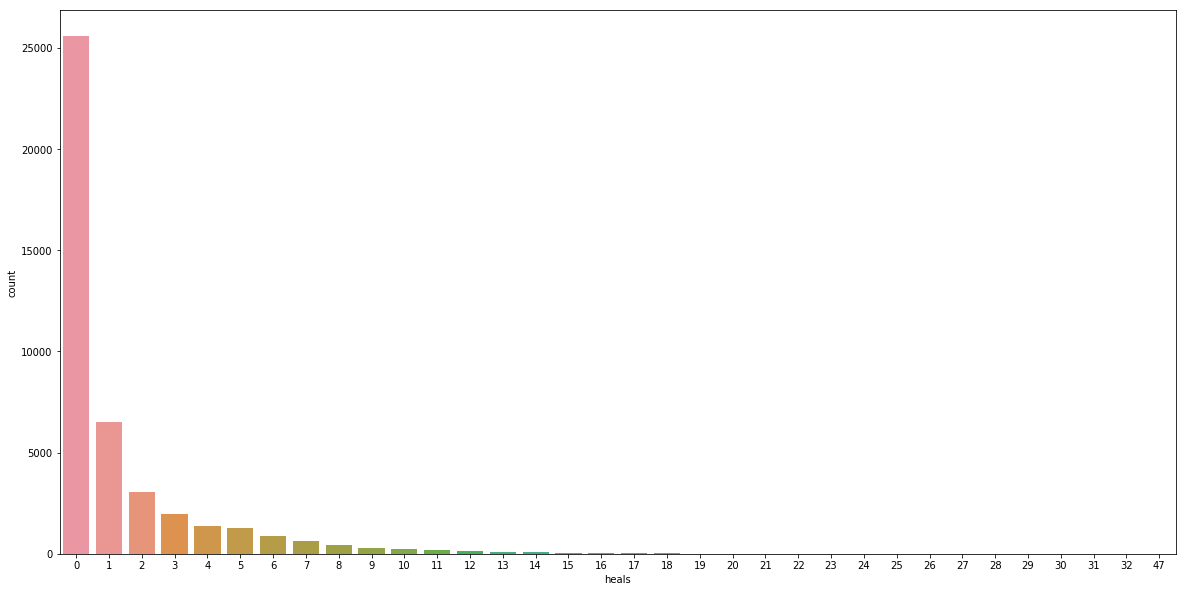

In [66]:
plt.figure(figsize = (20, 10))
sns.countplot(x = 'heals', data = df_final)
plt.show()

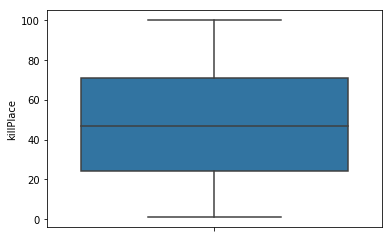

In [54]:
sns.boxplot(data = df_final, y = "killPlace")
plt.show()

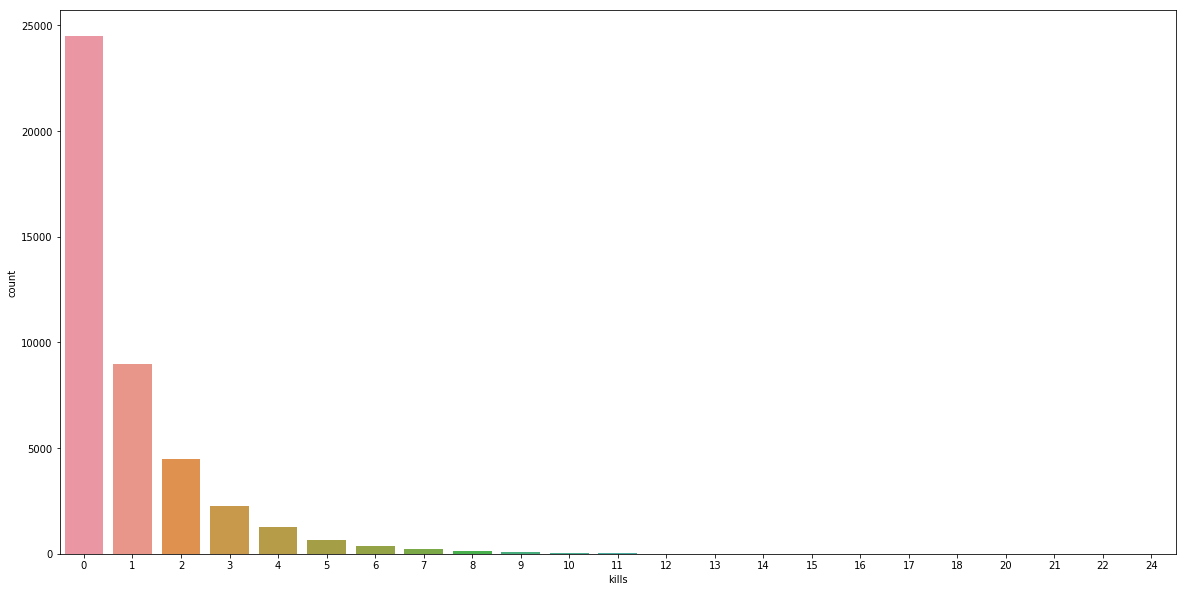

In [65]:
plt.figure(figsize = (20, 10))
sns.countplot(x = 'kills', data = df_final)
plt.show()

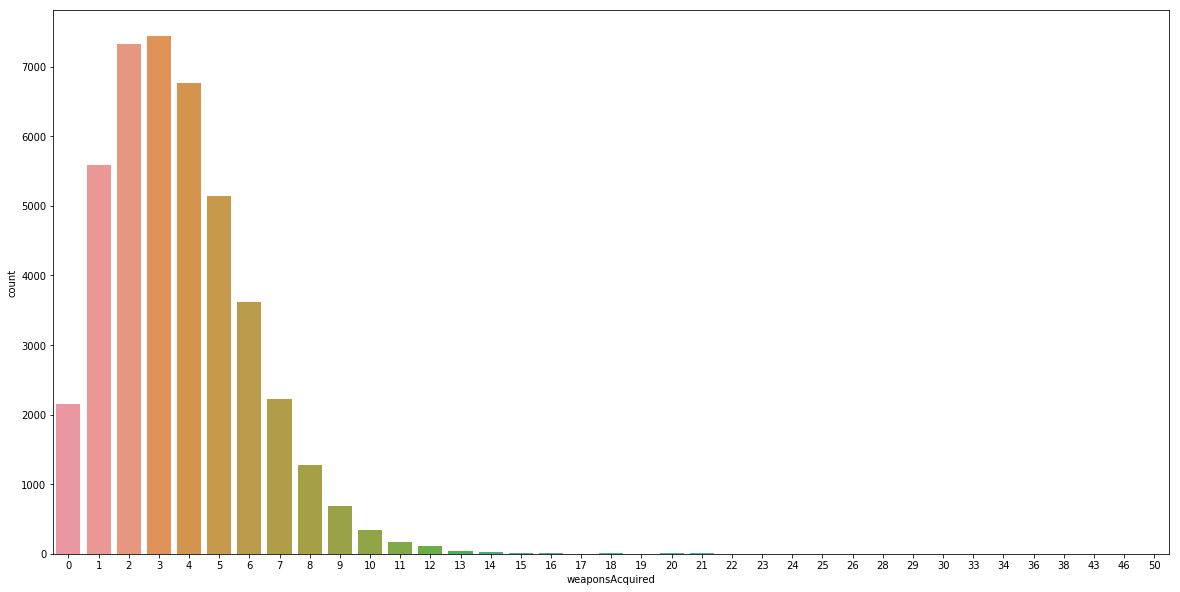

In [64]:
plt.figure(figsize = (20, 10))
sns.countplot(x = 'weaponsAcquired', data = df_final)
plt.show()

In [7]:
numeric_features = df_final.dtypes[df_final.dtypes != 'object'].index
spearman = df_final[numeric_features].corr(method='spearman')
corr_with_target = spearman.ix[-1][1:-1]
corr_with_target = corr_with_target[abs(corr_with_target).argsort()[::-1]]
corr_with_target

walkDistance       0.865730
killPlace         -0.717365
boosts             0.681501
weaponsAcquired    0.666893
heals              0.566713
longestKill        0.449632
damageDealt        0.445305
rideDistance       0.428628
kills              0.426815
killStreaks        0.388917
headshotKills      0.279707
DBNOs              0.255031
revives            0.250394
swimDistance       0.225892
vehicleDestroys    0.073130
rankPoints         0.072439
numGroups          0.057034
maxPlace           0.050375
roadKills          0.036745
winPoints          0.035901
teamKills          0.027962
killPoints         0.010564
matchDuration      0.000969
Name: winPlacePerc, dtype: float64

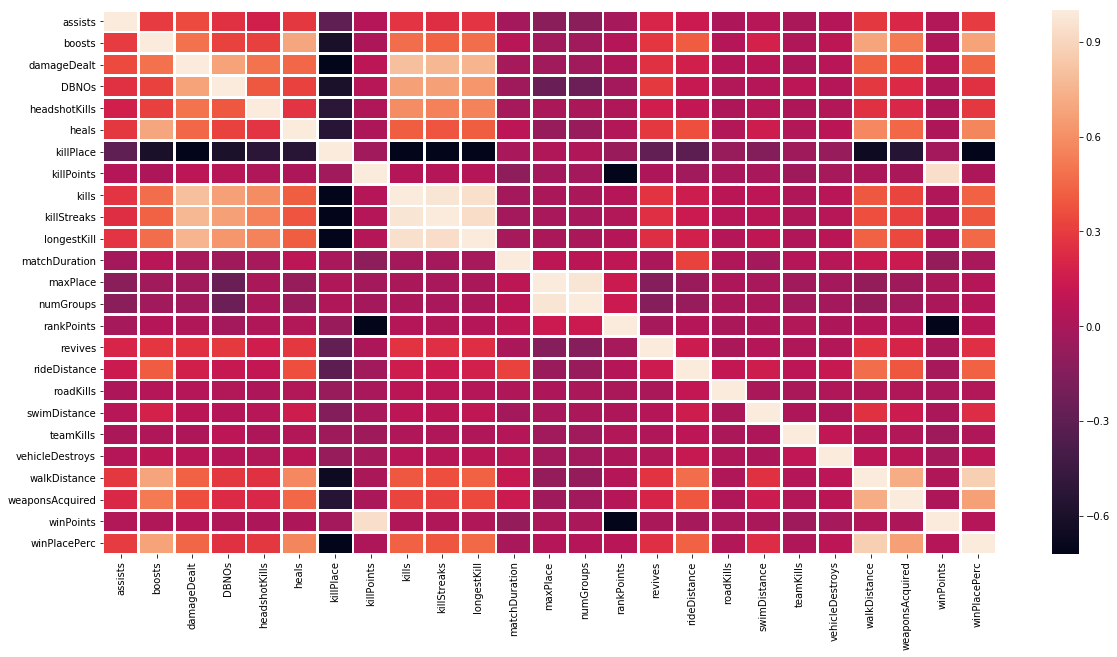

In [37]:
plt.figure(figsize = (20, 10))
sns.heatmap(spearman, robust = 1, linewidth = 1.7)
plt.show()

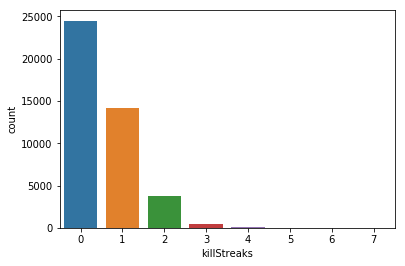

In [61]:
sns.countplot(x = 'killStreaks', data = df_final)
plt.show()

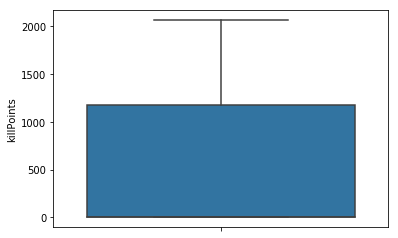

In [51]:
sns.boxplot(data = df_final, y = "killPoints")
plt.show()

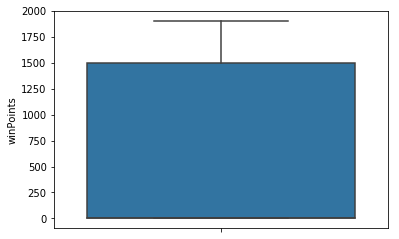

In [50]:
sns.boxplot(data = df_final, y = "winPoints")
plt.show()

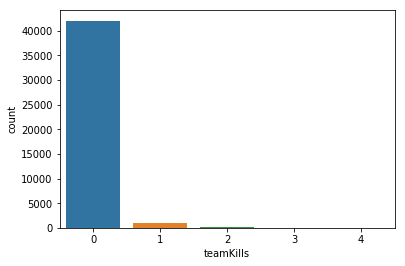

In [62]:
sns.countplot(x = 'teamKills', data = df_final)
plt.show()

<Figure size 3600x720 with 0 Axes>

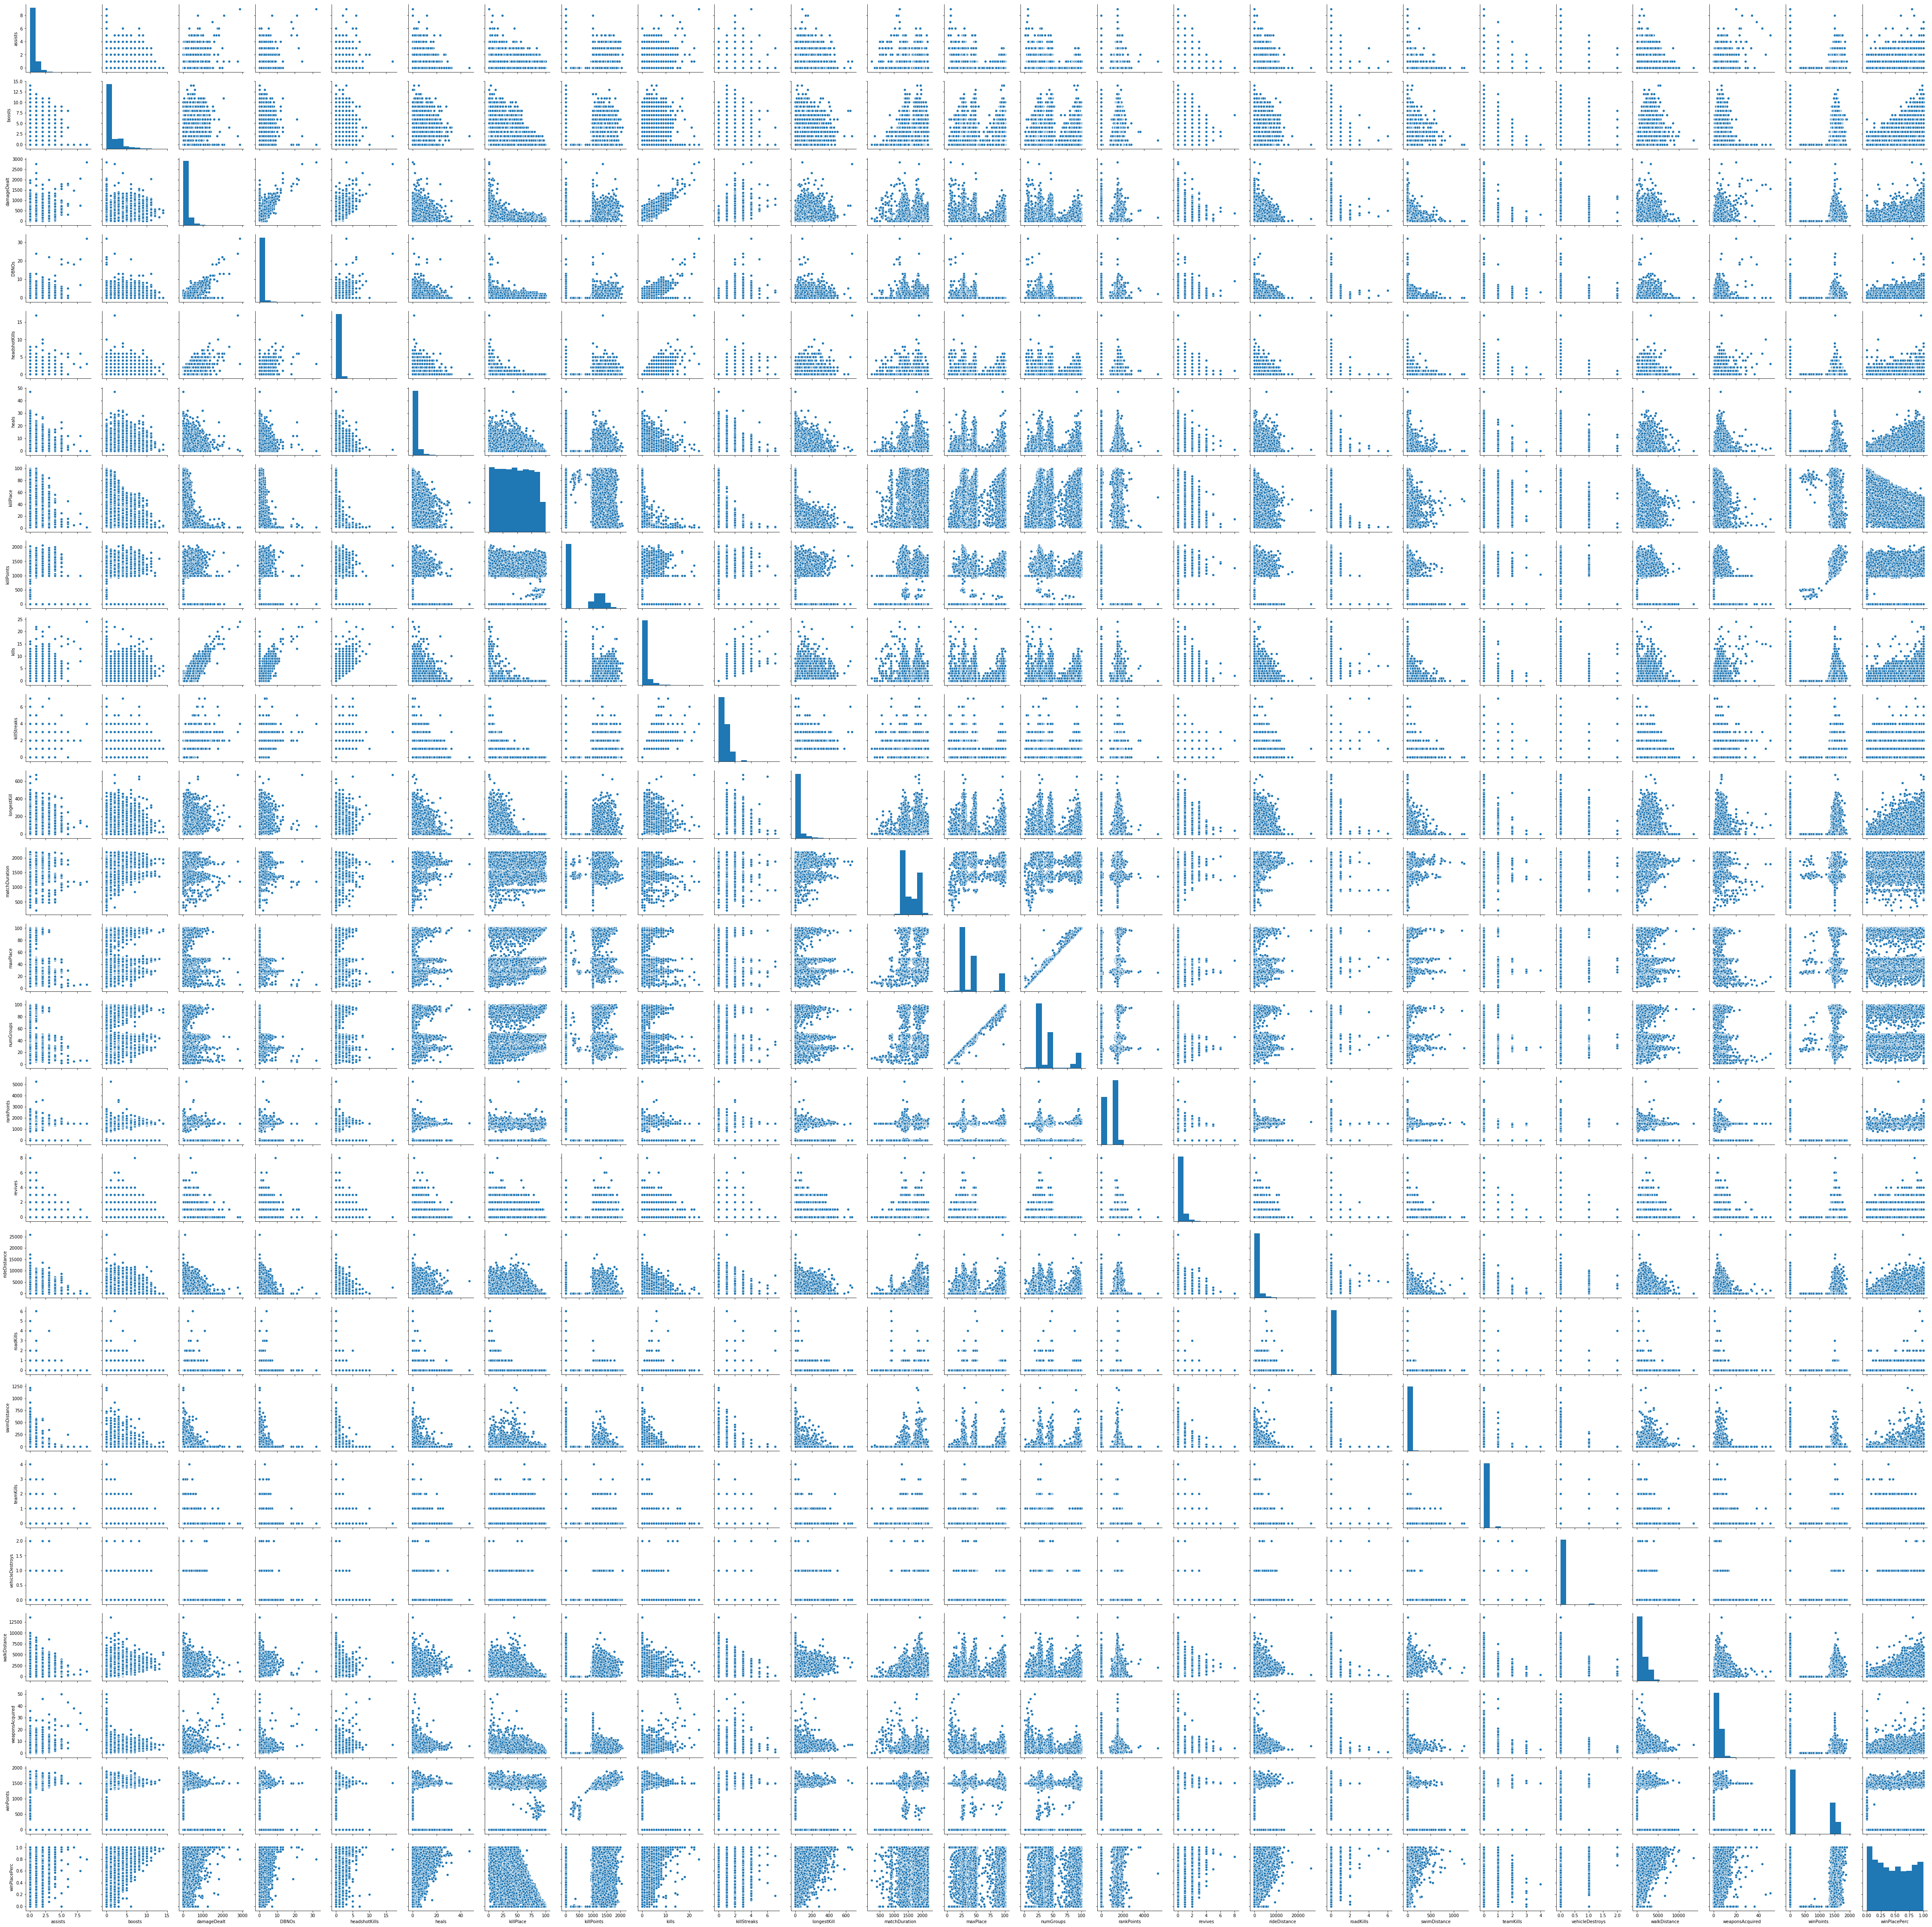

In [48]:
plt.figure(figsize = (50, 10))
sns.pairplot(data = df_final)
plt.show()

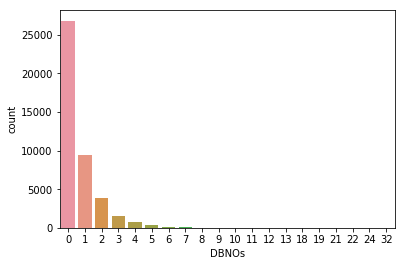

In [56]:
sns.countplot(x = 'DBNOs', data = df_final)
plt.show()

In [57]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43000 entries, 0 to 42999
Data columns (total 29 columns):
Id                 43000 non-null object
groupId            43000 non-null object
matchId            43000 non-null object
assists            43000 non-null int64
boosts             43000 non-null int64
damageDealt        43000 non-null float64
DBNOs              43000 non-null int64
headshotKills      43000 non-null int64
heals              43000 non-null int64
killPlace          43000 non-null int64
killPoints         43000 non-null int64
kills              43000 non-null int64
killStreaks        43000 non-null int64
longestKill        43000 non-null float64
matchDuration      43000 non-null int64
matchType          43000 non-null object
maxPlace           43000 non-null int64
numGroups          43000 non-null int64
rankPoints         43000 non-null int64
revives            43000 non-null int64
rideDistance       43000 non-null float64
roadKills          43000 non-null int64
s

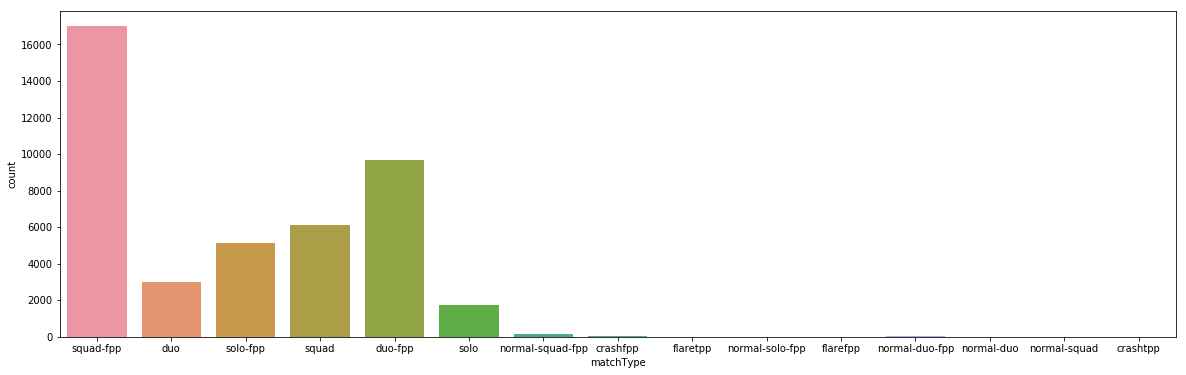

In [60]:
plt.figure(figsize = (20, 6))
sns.countplot(x = 'matchType', data = df_final)
plt.show()

In [72]:
df_final['matchDuration'] = df_final['matchDuration'].apply(lambda x : x/60)

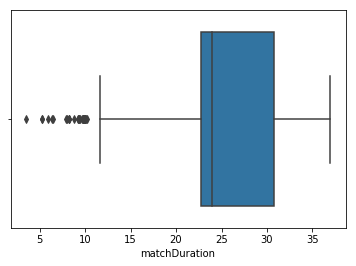

In [78]:
sns.boxplot(data = df_final, y = "matchDuration", orient = "h")
plt.show()

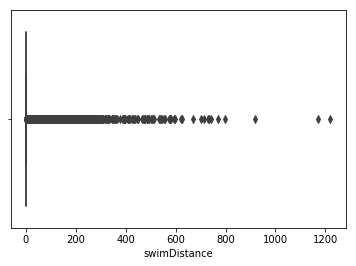

In [85]:
sns.boxplot(data = df_final, y = "swimDistance", orient = "h")
plt.show()

In [86]:
summary['swimDistance']

count    43000.000000
mean         4.383242
std         29.915869
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       1220.000000
Name: swimDistance, dtype: float64

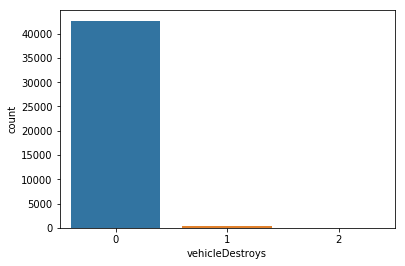

In [88]:
sns.countplot(x = 'vehicleDestroys', data = df_final)
plt.show()

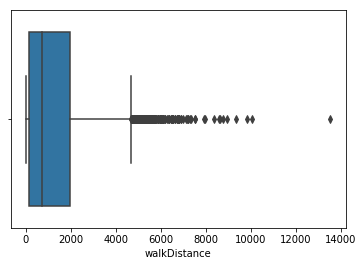

In [90]:
sns.boxplot(data = df_final, y = "walkDistance", orient = "h")
plt.show()

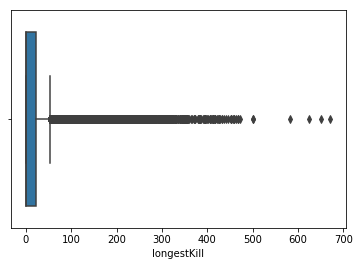

In [91]:
sns.boxplot(data = df_final, y = "longestKill", orient = "h")
plt.show()

In [92]:
summary['longestKill']

count    43000.000000
mean        22.513636
std         49.242529
min          0.000000
25%          0.000000
50%          0.000000
75%         21.342500
max        670.900000
Name: longestKill, dtype: float64

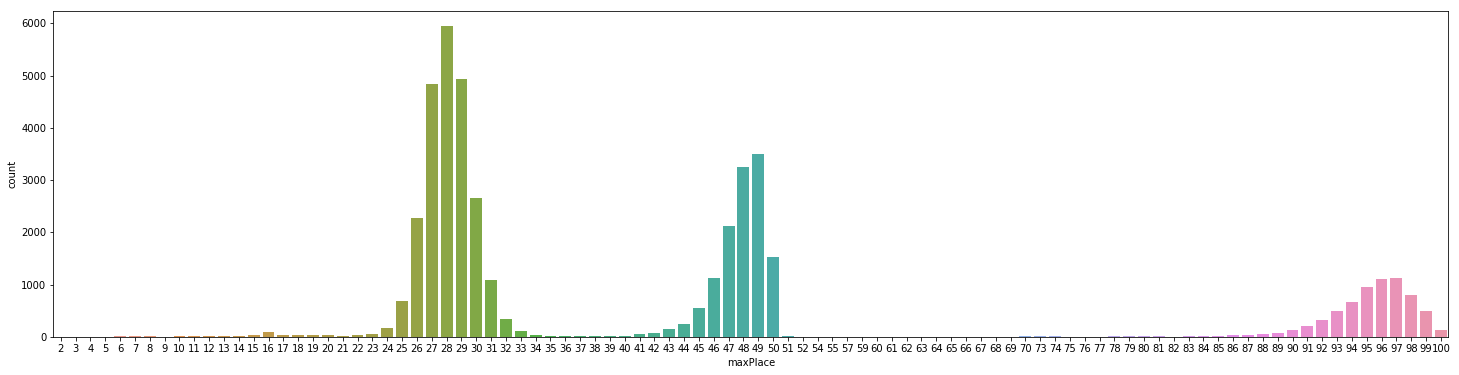

In [97]:
plt.figure(figsize = (25, 6))
sns.countplot(x = 'maxPlace', data = df_final)
plt.show()

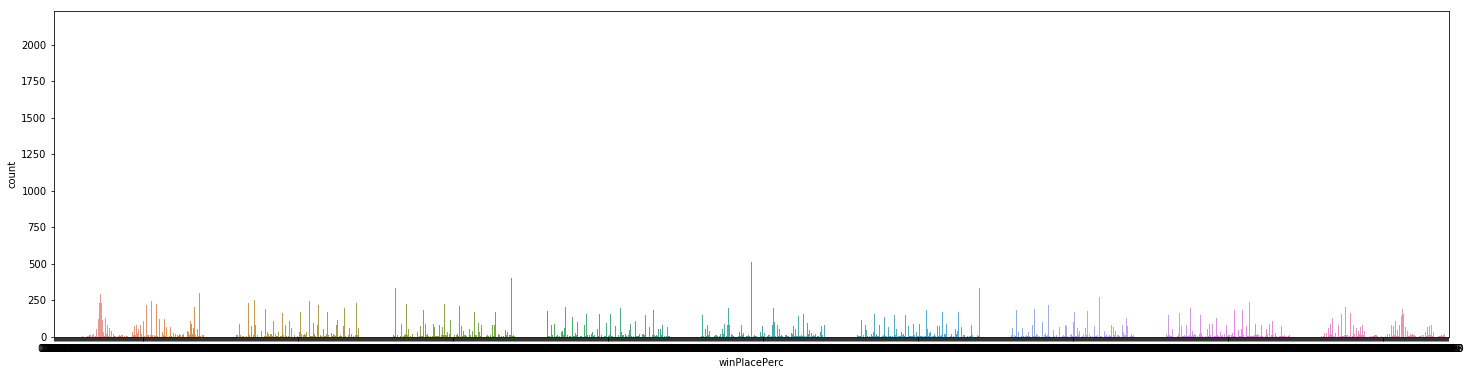

In [99]:
plt.figure(figsize = (25, 6))
sns.countplot(x = 'winPlacePerc', data = df_final)
plt.show()

In [9]:
X = df[numeric_features]

In [257]:
X.columns

RangeIndex(start=0, stop=25, step=1)

In [258]:
X.head()

0    1       2    3    4    5     6       7    8    9    ...     15  \
0  0.0  0.0    0.00  0.0  0.0  0.0  60.0  1241.0  0.0  0.0   ...    0.0   
1  0.0  0.0   91.47  0.0  0.0  0.0  57.0     0.0  0.0  0.0   ...    0.0   
2  1.0  0.0   68.00  0.0  0.0  0.0  47.0     0.0  0.0  0.0   ...    0.0   
3  0.0  0.0   32.90  0.0  0.0  0.0  75.0     0.0  0.0  0.0   ...    0.0   
4  0.0  0.0  100.00  0.0  0.0  0.0  45.0     0.0  1.0  1.0   ...    0.0   

       16   17     18   19   20       21   22      23      24  
0  0.0000  0.0   0.00  0.0  0.0   244.80  1.0  1466.0  0.4444  
1  0.0045  0.0  11.04  0.0  0.0  1434.00  5.0     0.0  0.6400  
2  0.0000  0.0   0.00  0.0  0.0   161.80  2.0     0.0  0.7755  
3  0.0000  0.0   0.00  0.0  0.0   202.70  3.0     0.0  0.1667  
4  0.0000  0.0   0.00  0.0  0.0    49.75  2.0     0.0  0.1875  

[5 rows x 25 columns]

In [10]:
X = imp.fit_transform(X)

In [11]:
X = pd.DataFrame(X)

In [12]:
y = X.iloc[:, -1]

In [13]:
X = X.iloc[:, :-1]

In [260]:
X.columns

RangeIndex(start=0, stop=24, step=1)

In [14]:
X_train, X_test, y_train, y_test = tts(X, y, test_size = .33, random_state = 1)

In [15]:
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

In [163]:
X_train = pca.fit_transform(X_train)
X_test = pca.fit_transform(X_test)

In [164]:
var = pca.explained_variance_ratio_

In [165]:
sum = 0
for i in range(len(var)):
    sum = sum + var[i]
    print(sum)

0.262266277928786
0.38753267453350326
0.4751136472345594
0.5527422515719544
0.6044684012914583
0.6479653030730401
0.6891048188895295
0.729248186021855
0.7653079895368261
0.800292011685888
0.8322110574927633
0.862726376821867
0.8871320135313653
0.9108192580794391
0.9335014802052234
0.9525366215388631
0.9688312901389123
0.9812828536353106
0.9899490102127023
0.9953611747230795
0.9987158516383927
0.9997252158703746
0.9999165007915075
0.9999999999999998


In [241]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
Id                 object
groupId            object
matchId            object
assists            int64
boosts             int64
damageDealt        float64
DBNOs              int64
headshotKills      int64
heals              int64
killPlace          int64
killPoints         int64
kills              int64
killStreaks        int64
longestKill        float64
matchDuration      int64
matchType          object
maxPlace           int64
numGroups          int64
rankPoints         int64
revives            int64
rideDistance       float64
roadKills          int64
swimDistance       float64
teamKills          int64
vehicleDestroys    int64
walkDistance       float64
weaponsAcquired    int64
winPoints          int64
winPlacePerc       float64
dtypes: float64(6), int64(19), object(4)
memory usage: 983.9+ MB


In [16]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [17]:
lr.score(X_train, y_train)

0.8306868571672897

In [18]:
lr.score(X_test, y_test)

0.8302384405488767

In [206]:
en = ElasticNet(alpha = .5, l1_ratio = 0, random_state = 1)
en.fit(X_train, y_train)

ElasticNet(alpha=0.5, copy_X=True, fit_intercept=True, l1_ratio=0,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=1, selection='cyclic', tol=0.0001, warm_start=False)

In [207]:
en.score(X_train, y_train)

0.7610361517920863

In [180]:
en.score(X_test, y_test)

-8.096852654126963e-06

In [ ]:
svr = SVR(verbose = True)
svr.fit(X_train, y_train)

[LibSVM]

In [175]:
svr.score(X_train, y_train)

0.920741759773965

In [176]:
svr.score(X_test, y_test)

0.89891256297255

In [19]:
rfr = RandomForestRegressor(n_estimators = 100, random_state = 1)
rfr.fit(X_train, y_train)

KeyboardInterrupt: 

In [212]:
rfr.score(X_train, y_train)

0.986721978765303

In [213]:
rfr.score(X_test, y_test)

0.9052589867541035

In [217]:
gbr = GradientBoostingRegressor(random_state = 1)
gbr.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=1, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [218]:
gbr.score(X_train, y_train)

0.9020616192835426

In [219]:
gbr.score(X_test, y_test)

0.8950657938654644

In [220]:
xgb = xgboost.XGBRegressor(random_state = 1)
xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=1,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [221]:
xgb.score(X_train, y_train)

0.9005457489829188

In [222]:
xgb.score(X_test, y_test)

0.8936599502299579

In [22]:
numeric_features = df_test.dtypes[df_test.dtypes != 'object'].index

In [23]:
df_test_final = df_test[numeric_features]

In [24]:
df_test_final = ss.fit_transform(df_test_final)

In [33]:
pd.DataFrame({"Id" : df_test['Id'], "winPlacePerc" : lr.predict(df_test_final)}).to_csv('pubg.csv', index = None)

In [32]:
df_test['Id'][0]

'9329eb41e215eb'